In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
class Perceptron:    
    def fit(self, X, y, n_iter=100):
        
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        # Add 1 for the bias term
        self.weights = np.zeros((n_features+1,))
        
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        
        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                    self.weights += y[j]*X[j, :]
                    
    
    def predict(self, X):
        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return
        
        n_samples = X.shape[0]
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)
        
        return y
    
    def score(self, X, y):
        pred_y = self.predict(X)
        
        return np.mean(y == pred_y)
    
    def plot(self, X, y):
        x1 = X[:, 0]
        x2 = X[:, 1]
        color = ['red' if value == 1 else 'blue' for value in y]
        plt.scatter(x1, x2, marker='o', color=color)
        plt.xlabel('X1 input feature')
        plt.ylabel('X2 input feature')
        plt.title('Perceptron')
        plt.show()

In [3]:
X, y = make_classification(
    n_features=2,
    n_classes=2,
    n_samples=100,
    n_redundant=0,
    n_clusters_per_class=1
)

0.5


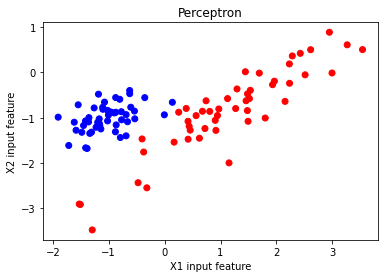

In [4]:
pred = Perceptron()
pred.fit(X, y)
pred.predict(X)
print(pred.score(X, y))
pred.plot(X, y)